# Table of Contents
 <p><div class="lev1 toc-item"><a href="#炸金花概率分析" data-toc-modified-id="炸金花概率分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>炸金花概率分析</a></div><div class="lev2 toc-item"><a href="#牌的构造和编码" data-toc-modified-id="牌的构造和编码-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>牌的构造和编码</a></div><div class="lev2 toc-item"><a href="#游戏逻辑" data-toc-modified-id="游戏逻辑-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>游戏逻辑</a></div><div class="lev2 toc-item"><a href="#牌面编码" data-toc-modified-id="牌面编码-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>牌面编码</a></div><div class="lev2 toc-item"><a href="#穷举法" data-toc-modified-id="穷举法-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>穷举法</a></div><div class="lev3 toc-item"><a href="#单人局" data-toc-modified-id="单人局-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>单人局</a></div><div class="lev3 toc-item"><a href="#双人局" data-toc-modified-id="双人局-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>双人局</a></div><div class="lev3 toc-item"><a href="#穷举法的复杂度" data-toc-modified-id="穷举法的复杂度-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>穷举法的复杂度</a></div><div class="lev2 toc-item"><a href="#蒙特卡罗方法" data-toc-modified-id="蒙特卡罗方法-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>蒙特卡罗方法</a></div><div class="lev3 toc-item"><a href="#双人" data-toc-modified-id="双人-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>双人</a></div><div class="lev3 toc-item"><a href="#多人" data-toc-modified-id="多人-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>多人</a></div><div class="lev2 toc-item"><a href="#近似计算方法" data-toc-modified-id="近似计算方法-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>近似计算方法</a></div><div class="lev2 toc-item"><a href="#总结" data-toc-modified-id="总结-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>总结</a></div><div class="lev3 toc-item"><a href="#概率" data-toc-modified-id="概率-171"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>概率</a></div><div class="lev3 toc-item"><a href="#方法" data-toc-modified-id="方法-172"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>方法</a></div>

# 炸金花概率分析

*by 郭勇智*

![Alt text](http://i-3-499.715083.com/2017/2/17/6e51a3c1-36d9-4cfa-be59-7818eec9d5d0.png?imageView2/2/q/65/w/600)

---
使用一副去掉到大小王的扑克牌，共 52 张牌，游戏时每人三张牌，牌面从大到小依次为：
>+ 豹子（炸弹）：三张点相同的牌。例：AAA、222。
+ 同花顺（顺金、色托）：花色相同的顺子。例：黑桃456、红桃789。
+ 同花（金花、色皮）：花色相同，非顺子。例：黑桃368，方块145。
+ 顺子（拖拉机）：花色不同的顺子。例：黑桃5红桃6方块7。最大的顺子为花色不同的QKA，最小的顺子为花色不同的123。
+ 对子：两张点数相同的牌。例：223，334。
+ 单张：三张牌不组成任何类型的牌。

In [15]:
using Plots

## 牌的构造和编码

In [16]:
AllCards = [a+b*im for a in 2:14 for b in 1:4]

52-element Array{Complex{Int64},1}:
  2 + 1im
  2 + 2im
  2 + 3im
  2 + 4im
  3 + 1im
  3 + 2im
  3 + 3im
  3 + 4im
  4 + 1im
  4 + 2im
  4 + 3im
  4 + 4im
  5 + 1im
    ⋮    
 12 + 1im
 12 + 2im
 12 + 3im
 12 + 4im
 13 + 1im
 13 + 2im
 13 + 3im
 13 + 4im
 14 + 1im
 14 + 2im
 14 + 3im
 14 + 4im

实部表牌面大小，A尖映射到14，序数属性；虚部表花色，标称属性。  
52张，不含大小王。

## 游戏逻辑

>+ 豹子（炸弹）：三张点相同的牌。例：AAA、222。
+ 同花顺（顺金、色托）：花色相同的顺子。例：黑桃456、红桃789。
+ 同花（金花、色皮）：花色相同，非顺子。例：黑桃368，方块145。
+ 顺子（拖拉机）：花色不同的顺子。例：黑桃5红桃6方块7。最大的顺子为花色不同的QKA，最小的顺子为花色不同的123。
+ 对子：两张点数相同的牌。例：223，334。
+ 单张：三张牌不组成任何类型的牌。

判断是否是该牌型

In [17]:
isBomb(a, b, c) = a.re == b.re == c.re #炸弹

function isPair(a, b, c)  #对子
    a = a.re
    b = b.re
    c = c.re
    a == b || b == c || c == a
end

function isStraight(a, b, c)  #顺子
    a, b, c = sort([a.re, b.re, c.re], rev=true)
    (a == b + 1 && b == c + 1) || (a, b, c) == (14, 3, 2)
end

isFlush(a, b, c) = a.im == b.im == c.im #同花

isStraightFlush(a, b, c) = isFlush(a, b, c) && isStraight(a, b, c) #同花顺

isStraightFlush (generic function with 1 method)

---
在某牌型中按重要性降序排序三张牌。

In [18]:
sortBomb(cds...) =  real([cds...])

function sortPair(a, b, c)
    a = a.re
    b = b.re
    c = c.re
    if a == b
        a, b, c
    elseif b == c
        b, c, a
    elseif c == a
        a, c, b
    else
        nothing
    end
end

function sortStraight(a, b, c)
    a, b, c = sort([a.re, b.re, c.re], rev=true)
    if (a, b, c) == (14, 3, 2)
        3, 2, 14
    else
        a, b, c
    end
end        

sortSingle(a, b, c) = sort([a.re, b.re, c.re], rev=true)

sortFlush(a, b, c) = sortSingle(a, b, c)

sortStraightFlush(a, b, c) = sortStraight(a, b, c)

sortStraightFlush (generic function with 1 method)

## 牌面编码

In [19]:
function getType(cds...)
    if isBomb(cds...)
        return 5
    elseif isFlush(cds...)
        if isStraight(cds...)
            return 4
        else
            return 3
        end
    elseif isStraight(cds...)
        return 2
    elseif isPair(cds...)
        return 1
    else
        return 0
    end
end

getType (generic function with 1 method)

In [20]:
TypeNames = ["Single", "Pair", "Straight", "Flush", "StraightFlush", "Bomb"];

为三张牌组成的牌面生成编码，有序编码，即小牌码小、大牌码大。

In [21]:
wei = (16, 13, 13, 1)
bias = (0, -2, -2, -2)

(0, -2, -2, -2)

In [22]:
function encode(cds...)
    if isBomb(cds...)
        c = 5, sortBomb(cds...)

    elseif isFlush(cds...)
        if isStraight(cds...)
            c = 4, sortStraight(cds...)

        else
            c = 3, sortFlush(cds...)
        end

    elseif isStraight(cds...)
        c = 2, sortStraight(cds...)

    elseif isPair(cds...)
        c = 1, sortPair(cds...)

    else
        c = 0, sortSingle(cds...)
    end
    c0, (c1, c2, c3) = c
    w0, w1, w2, w3 = wei
    b0, b1, b2, b3 = bias
    return Int(
        ((((c0 + b0) * w0 + c1 + b1) * w1 + c2 + b2) * w2 + c3 + b3) * w3)
end

encode (generic function with 1 method)

In [23]:
function decode(c)
    ci = Int[]
    for i in length(wei):-1:2
        c = c ÷ wei[i]
        push!(ci, (c % wei[i - 1] - bias[i]))
    end
    push!(ci, (c ÷ wei[1]))
    s = TypeNames[ci[end]+1] * ": " * "$(ci[end-1:-1:1])"
    return s
end

decode (generic function with 1 method)

In [24]:
@time decode(encode(2+2im, 14+2im, 3+2im))

  0.301522 seconds (846.53 k allocations: 42.544 MiB, 4.03% gc time)


"StraightFlush: [3, 2, 14]"

## 穷举法

### 单人局

单人不成局，实际上是从52张中任取3张，这也代表了任意玩家数时桌面上所有牌面的分布情况。

In [11]:
struct CombIter
    arr::AbstractArray
    n::Int
end

function Base.iterate(iter::CombIter)
    ind=[1:iter.n...]
    (@view iter.arr[ind]), ind
end

function Base.iterate(iter::CombIter, ind)
    l = length(iter.arr)
    n = length(ind)
    for i in n:-1:1
        if ind[i] < l - (n - i)
            ind[i] += 1
            for j in i+1 : n
                ind[j] = ind[j-1] + 1
            end
            return (@view iter.arr[ind]), ind
        end
    end
    return nothing
end

In [7]:
function combinations(fun, arr, n)
    l = length(arr)
    ind = [1:n...]
    i = n
    fun(@view arr[ind])
    while i>0
        if ind[i] < l - (n - i)
            ind[i] += 1
            for j in i+1 : n
                ind[j] = ind[j-1] + 1
            end
            i = n
            fun(@view arr[ind])
        else
            i -= 1
        end
    end
end

combinations (generic function with 1 method)

In [61]:
@time begin 
weightList = Int[]
for cards in CombIter(AllCards, 3)
    push!(weightList, encode(cards...))
end
end

  0.046777 seconds (616.50 k allocations: 26.085 MiB, 7.36% gc time)


In [65]:
@time begin 
weightList = Int[]
combinations(AllCards, 3) do cards
    push!(weightList2, encode(cards...))
end
end

  0.096393 seconds (642.41 k allocations: 28.157 MiB, 3.72% gc time)


In [43]:
using Profile

In [13]:
@timev begin
for cs in CombIter([1:100...], 5)
    #println(cs)
end
end

 20.825026 seconds (301.15 M allocations: 7.853 GiB, 3.30% gc time)
elapsed time (ns): 20825026403
gc time (ns):      686467618
bytes allocated:   8432206368
pool allocs:       301150092
GC pauses:         368


In [66]:
@timev combinations([1:100...], 5) do arr
    #print(arr)
end

  6.600320 seconds (225.91 M allocations: 5.612 GiB, 6.03% gc time)
elapsed time (ns): 6600319699
gc time (ns):      397776521
bytes allocated:   6025307421
pool allocs:       225909458
non-pool GC allocs:33
GC pauses:         262


In [158]:
sort!(weightList);

In [159]:
length(weightList)

22100

In [67]:
weightList

22100-element Array{Int64,1}:
   520
   520
   520
   520
   520
   520
   520
   520
   520
   520
   520
   520
   520
     ⋮
 15350
 15350
 15350
 15350
 15533
 15533
 15533
 15533
 15716
 15716
 15716
 15716

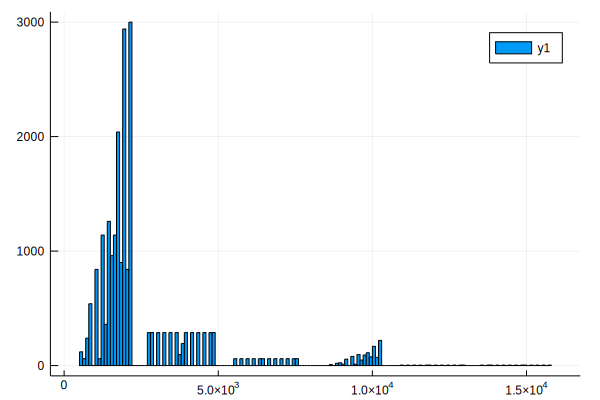

In [206]:
histogram(weightList, bins=150)

按牌面大小的整体分布，分别为：散、对、顺子、同花、同花顺、豹子

In [187]:
res_1 = zeros(6)
for cards in CombIter(AllCards, 3)
    res_1[getType(cards...)+1] += 1
end

In [188]:
res_1

6-element Array{Float64,1}:
 16440.0
  3744.0
   720.0
  1096.0
    48.0
    52.0

In [189]:
trueRate_1 = res_1 / sum(res_1)

6-element Array{Float64,1}:
 0.7438914027149321   
 0.16941176470588235  
 0.03257918552036199  
 0.049592760180995475 
 0.0021719457013574662
 0.002352941176470588 

|类型|总数|比重|
|:-:|:-:|:-:|:-:|
|散|16440|74.39%|
|对|3744|16.94%|
|顺子|720|3.26%|
|同花|1096|4.96%|
|同花顺|48|0.22%|
|豹子|52|0.24%|

按稀有度，顺子比同花稀有，同花顺比豹子稀有，虽然规定是同花及豹子更大。

In [193]:
decode(maximum(weightList)), decode(minimum(weightList))

("Bomb: [14, 14, 14]", "Single: [5, 3, 2]")

In [201]:
function bigerRate(a, b, c)
    w = encode(a, b, c)
    return sum(weightList .< w) / length(weightList)
end

bigerRate (generic function with 1 method)

In [202]:
bigerRate(14+0im, 13+0im, 3 + 3im)

0.7194570135746606

### 双人局

$n$人局情况，解决思路是先一次性取出$n$个人的牌，然后再分给他们，则总情况数是
$$C_{52}^{3n}\cdot C_{3n}^{3}C_{3n-3}^{3}C_{3n-6}^{3}\cdots C_{6}^{3}C_{3}^{3}$$
第一项是组合数，后面的是分配数。

需要先实现每种分配情况的枚举：

In [34]:
class sList(list):
    '支持差集运算的lsit'
    def __sub__(self, oth):
        return sList([x for x in self if x not in oth])

In [35]:
"""
把l按segs分配len(segs)份
l: list
segs: 每份容量大小组成的tuple
return: 结果tuple的迭代器
"""
function dist(l, segs):

    getResult = lambda ind: tuple(tuple(l[x] for x in L) for L in ind)
    length = len(l)
    assert (length == sum(segs))
    ind = sList(range(length))
    pools = []
    subLists = []
    result = []
    for i, seg in enumerate(segs):
        if i == 0:
            subLists.append(ind)
            pools.append(combinations(subLists[i], seg))
            result.append(sList(next(pools[i])))
        else:
            subLists.append(subLists[i - 1] - result[i - 1])
            pools.append(combinations(subLists[i], seg))
            result.append(sList(next(pools[i])))

    while True:
        yield getResult(result)

        for i, pool in reversed(list(enumerate(pools))):
            try:
                re = sList(next(pool))
                result[i] = re
                try:
                    for rei in range(i + 1, len(segs)):
                        subLists[rei] = subLists[rei - 1] - result[rei - 1]
                        pools[rei] = combinations(subLists[rei], segs[rei])
                        result[rei] = sList(next(pools[rei]))
                except:
                    assert (False)
                break
            except StopIteration:
                if i == 0:
                    return
                else:
                    continue

In [36]:
gg = dist([1, 2, 3, 4], (1, 2, 1))

In [37]:
*gg,

(((1,), (2, 3), (4,)),
 ((1,), (2, 4), (3,)),
 ((1,), (3, 4), (2,)),
 ((2,), (1, 3), (4,)),
 ((2,), (1, 4), (3,)),
 ((2,), (3, 4), (1,)),
 ((3,), (1, 2), (4,)),
 ((3,), (1, 4), (2,)),
 ((3,), (2, 4), (1,)),
 ((4,), (1, 2), (3,)),
 ((4,), (1, 3), (2,)),
 ((4,), (2, 3), (1,)))

以下计算全场最大是某类型牌的概率

In [38]:
# 运行时间很长
res_2 = [0] * 6
run = False
if run:
    for cards in combinations(AllCards, 6):
        for cds1, cds2 in dist(cards, (3, 3)):
            res_2[max(getType(*cds1), getType(*cds2))] += 1

In [39]:
res_2

[0, 0, 0, 0, 0, 0]

某次运行结果：

In [40]:
aRes_2 = array([225461472, 114200640, 24657792, 39174400, 1762496, 1913600])  #某次运行结果

In [41]:
trueRate_2 = aRes_2 / aRes_2.sum()
trueRate_2

array([ 0.5537,  0.2805,  0.0606,  0.0962,  0.0043,  0.0047])

最大牌|单人|双人
--|-
散|74.39%|55.37%
对|16.94%|28.05%
顺子|3.26%|6.06%
同花|4.96%|9.62%
同花顺|0.22%|0.43%
豹子|0.24%|0.47%

### 穷举法的复杂度

如上所述，$n$人局总情况数为：
$$C_{52}^{3n}\cdot C_{3n}^{3}C_{3n-3}^{3}C_{3n-6}^{3}\cdots C_{6}^{3}C_{3}^{3}$$

In [42]:
from scipy.special import comb

In [43]:
from functools import reduce

In [44]:
def complication(n):
    rdFun = lambda x, y: x * comb(y, 3)
    li = list(range(6, 6 + 3 * (n - 2) + 1, 3))
    cb = comb(52, 3 * n)
    li = [cb] + li
    #print(li)
    return cb, reduce(rdFun, li)

In [45]:
complication(3)

(3679075400.0, 6180846672000.0)

In [46]:
comb(52, 9) * comb(6, 3) * comb(9, 3)

6180846672000.0

或者化简后有：  
$$\frac{52!}{6^n(52-(3n)!)}$$

In [47]:
from math import factorial

In [48]:
complication2 = lambda n: factorial(52) / (6**n * factorial(52 - 3 * n))

In [49]:
complication2(3)

6180846672000.0

结果一样

In [50]:
cp = [complication(i)[1] for i in range(1, 52 // 3 + 1)]  #复杂度
cb = [complication(i)[0] for i in range(1, 52 // 3 + 1)]  #其中组合数部分
di = ([cp / cb for cb, cp in zip(cb, cp)])  #其中分配数部分

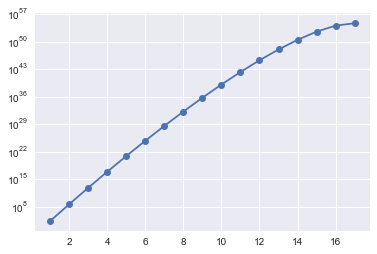

In [51]:
plot(r_[1:18], cp, '-o')
plt.yscale('log')

穷举法复杂度随人数略呈指数上升（图为对数坐标轴），且图中斜率减小，所以复杂度$O(a^n)$，$a$是$n$的单减函数。实际上有
$$a=\frac{(55-3n)(54-3n)(53-3n)}{6}$$
$a|_{n=17}=1$，可知图像最右端点的斜率为$log1=0$  
而如果突破52张牌限制，随牌数复杂度要比阶乘要大得多，故而想通过穷举法计算概率不现实。

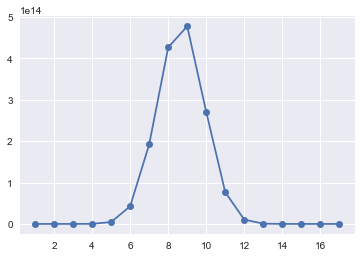

In [52]:
plot(r_[1:18], cb, '-o');

组合数$C_{52}^{3n}$先升后降

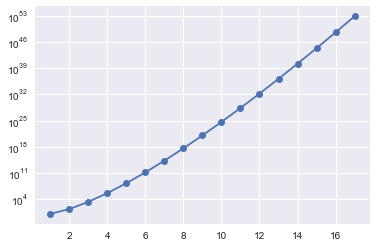

In [53]:
plot(r_[1:18], di, '-o')
plt.yscale('log')

分配数增长快于指数

估计计算耗时：

In [54]:
%%timeit -o
res_t = [0] * 6
for cards in combinations(AllCards[:15], 6):
    for cds1, cds2 in dist(cards, (3, 3)):
        res_t[max(getType(*cds1), getType(*cds2))] += 1

1.38 s ± 54.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<TimeitResult : 1.38 s ± 54.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [55]:
spc = _.best / (comb(15, 6) * comb(6, 3))  #秒/状态

In [56]:
cp=array(cp)

In [57]:
cp[0] * spc, cp[1] * spc / 3600  #单人（秒），双人（小时）

(0.29508778458297441, 1.5101937064324222)

可以看到上面穷举双人局所需要的时间

In [58]:
years = cp * spc / 3600 / 24 / 365
years  #所需年数

array([  9.3572e-09,   1.7240e-04,   2.6170e+00,   3.2296e+04,
         3.1909e+08,   2.4793e+12,   1.4836e+16,   6.6688e+19,
         2.1847e+23,   5.0248e+26,   7.7382e+29,   7.4984e+32,
         4.1991e+35,   1.2009e+38,   1.4411e+40,   5.0439e+41,   2.0176e+42])

sec, h, years, 万年, 亿年 ... 10^40+ years

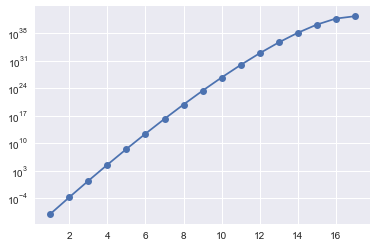

In [59]:
plot(r_[1:18], years, '-o')
plt.yscale('log')

## 蒙特卡罗方法

目的也是计算全场最大是某类型牌的概率

In [60]:
def choiceCards(cards, n):
    return np.random.choice(cards,size=n,replace=False)

In [61]:
def biggest(cardsList): #返回全场最大牌的类型
    typeList = [getType(*cards) for cards in cardsList]
    return max(typeList)

In [62]:
def oneTrial(cards, num_people):
    cds = choiceCards(cards, 3*num_people)
    cdsList = np.split(cds,num_people)
    #print(cdsList)
    re=[0]*6
    re[biggest(cdsList)]=1 #one-hot
    return re

In [63]:
class MonteCarlo:
    '''
    进行蒙特卡洛试验的抽象基类\n
    子类需重载以下property:
        n_samples: int, 试验总样本数，当且仅当试验过后有＞0
        rate: float 1D-array, 当前概率（频率），长度为随机变量数目
        X: float 1D-array, 记录历史样本数变化，用于绘图时x轴
        rateHistory: float 2D-array, shape(len(X), len(rate)), 记录历史概率变化，对应于X，用于绘图\n        
    子类需重载以下方法:
        trial(self, times)
    '''

    def __init__(self, varNames, accuracy=None):
        '''varNames: str list. 各随机变量的名称，用于绘图标注
        accuracy: float, autoFit()的目标精度
        '''
        self.accuracy = accuracy  #训练的目标精度
        self.varNames = varNames

    #需重载
    n_samples = property(None)
    rate = property(None)

    X = property(None)
    rateHistory = property(None)

    def trial(self, times):
        '''
        需重载
        调用时进行times次试验
        会被autoFit多次调用，每次被调用可仅添加一个历史（更新一次X,rateHistory）
        '''
        pass

    def autoFit(self, accuracy=None, bunchLen=None, n_groups=100):
        '''
        accuracy: 目标精度
        bunchLen: 一次性训练数，作每次调用trial()时的参数
        n_groups: 大约分n_groups次训练，在bunchLen指定时被覆盖
        '''
        if accuracy:
            self.accuracy = accuracy
        else:
            self.accuracy = self.accuracy or 0.01
            accuracy = self.accuracy

        #估计总组样本数
        sizeFun = lambda r: int((r * (1 - r)).max() / (accuracy / 3)**2)

        if not self.n_samples > 0:
            self.trial()
        while not ((3 * self.sigma < accuracy).all() 
                   and ((0 < self.sigma).all() or self.n_samples>10000)):
            #3-sigma准则，犯错概率小于0.3%
            n = bunchLen or sizeFun(self.rate) // n_groups or 1
            self.trial(n)
        return self

    def plotRate(self):
        plot(self.X, self.rateHistory)
        plt.yscale('log')
        plt.legend(self.varNames)
        plt.show()

    #当前标准差，长度为随机变量数目
    sigma = property(lambda sf: sqrt(sf.rate * (1 - sf.rate) / sf.n_samples))

    def getProgress(self):
        if self.n_samples > 0:
            return (self.accuracy / (3 * self.sigma.max()))**2
        else:
            return 0

    progress = property(getProgress)  #属于闭区间[0,1], 完成进度

    def isDone(self):
        return self.progress >= 1

    def __repr__(self):
        if not self.n_samples > 0:
            return 'Never fit.'
        else:
            return ('goal accuracy is %s,\t' % self.accuracy +
                    '%s trials yet, %.2f%% completed.' %
                    (self.n_samples, self.progress * 100) +
                    (self.isDone() and '   DONE!\n'
                     or '\n') + '3-sigma: %s, max: %.4g\n' %
                    (3 * self.sigma,
                     3 * self.sigma.max()) + 'rate is: %s' % self.rate)

从getProgress()和sizeFun()可以看出，蒙特卡罗方法复杂度随精度（误差分之一）增加呈平方上升，$O(n^2)$，多项式复杂度，可接受。

In [64]:
class gfMon(MonteCarlo):
    '用于炸金花蒙特卡洛试验'
    def __init__(self, trialFun, names=TypeNames, accuracy=None):
        'trialFun: 调用返回‘one-hot’列表，如：[0,0,1,0,0,0]'
        MonteCarlo.__init__(self,names,accuracy)
        self.trialFun = trialFun
        self.trialList = []
        self.upToDate = False

    def trial(self, times=100):
        assert (times > 0)
        re = []
        for i in range(times):
            re.append(self.trialFun())
        self.trialList.append(np.sum(re,axis=0))
        self.upToDate = False
        return self

    def refresh(self):
        if self.trialList:
            tArr = array(self.trialList)
            cArr = tArr.cumsum(axis=0)
            self._X = cArr.sum(axis=1)
            sumVector = self._X.reshape(-1, 1)
            self._rateHis = cArr / sumVector
            self.upToDate = True
        else:
            self._X = [np.nan]
            self._rateHis = [np.nan]

    def getrateHistory(self):
        if not self.upToDate:
            self.refresh()
        return self._rateHis

    def getX(self):
        if not self.upToDate:
            self.refresh()
        return self._X
     
    X = property(getX)
    n_samples = property(lambda sf: sf.X[-1])
    rateHistory = property(getrateHistory)
    rate = property(lambda sf: sf.rateHistory[-1])   

### 双人

In [65]:
m2 = gfMon(lambda: oneTrial(AllCards, 2))
m2

Never fit.

In [66]:
m2.autoFit(accuracy=0.01)

goal accuracy is 0.01,	22335 trials yet, 100.37% completed.   DONE!
3-sigma: [ 0.01    0.009   0.0049  0.0058  0.0013  0.0014], max: 0.009982
rate is: [ 0.5524  0.2824  0.0627  0.0935  0.0043  0.0046]

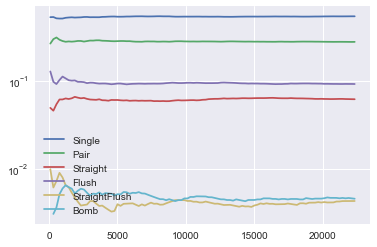

In [67]:
m2.plotRate()

In [68]:
trueRate_2

array([ 0.5537,  0.2805,  0.0606,  0.0962,  0.0043,  0.0047])

In [69]:
trueRate_2 - m2.rate

array([  1.3210e-03,  -1.9529e-03,  -2.1678e-03,   2.7258e-03,
        -1.4315e-05,   8.8156e-05])

达到宣称精度

### 多人

In [70]:
import threading
import time
import datetime

In [71]:
class monitorThread(threading.Thread):
    '''
    监控线程
    '''

    def __init__(self, mon, name, sleepTime=0.1, step=0.2):
        'step: 日志步进值'
        threading.Thread.__init__(self)
        self.mon = mon
        self.name = name
        self.sleepTime = sleepTime
        self.step = step

    def echo(self, duration):
        def toDelta(t):
            if np.isnan(t):
                return t
            else:
                return datetime.timedelta(seconds=int(t))

        prg = self.mon.progress
        try:
            total = duration / prg
        except ZeroDivisionError:
            total = np.nan
        remain = total - duration
        print('#' + self.name + '#\t' + 'run %s, total %s, remain %s' %
              (toDelta(duration), toDelta(total), toDelta(remain)))
        print(self.mon, '\n', flush=True)

    def run(self):
        self.t0 = time.time()

        duration = 0
        while duration < 0.4:  #等待足够采样时长
            duration = time.time() - self.t0
            prg = self.mon.progress
            if prg >= 1:
                self.echo(time.time() - self.t0)
                return
            time.sleep(0.01)

        prg_last = prg = self.mon.progress
        while prg_last == prg:  #等待跳变
            time.sleep(0.01)
            prg = self.mon.progress
        self.echo(time.time() - self.t0)

        p = round(prg, 1) + self.step  #步进

        while True:
            prg = self.mon.progress
            if (0.9 > prg > p or prg >= 1):
                now = time.time()
                duration = now - self.t0

                self.echo(duration)
                p = round(prg, 1) + self.step
            if prg >= 1:
                break
            time.sleep(self.sleepTime)

In [72]:
m = {}

def fitAll(accuracy=0.01, n_groups=100, step=0.2):
    for n in range(2, 18):
        print('\n' + '-' * 20 + '%s presons analyzing...' % n + '-' * 20)
        m[n] = gfMon(lambda: oneTrial(AllCards, n))
        mntor = monitorThread(m[n], '%s presons' % n, sleepTime=1, step=step)
        mntor.start()

        m[n].autoFit(accuracy=accuracy, n_groups=n_groups)
        mntor.join()

In [73]:
fitAll(accuracy=0.01, n_groups=100, step=0.5)


--------------------2 presons analyzing...--------------------
#2 presons#	run 0:00:00, total 0:00:01, remain 0:00:00
goal accuracy is 0.01,	7650 trials yet, 34.34% completed.
3-sigma: [ 0.0171  0.0154  0.0082  0.0103  0.0022  0.0024], max: 0.01707
rate is: [ 0.5497  0.2803  0.0612  0.0997  0.0043  0.0048] 

#2 presons#	run 0:00:01, total 0:00:01, remain 0:00:00
goal accuracy is 0.01,	22302 trials yet, 100.26% completed.   DONE!
3-sigma: [ 0.01    0.009   0.0048  0.0059  0.0014  0.0013], max: 0.009987
rate is: [ 0.5534  0.2815  0.0604  0.0961  0.0046  0.0041] 


--------------------3 presons analyzing...--------------------
#3 presons#	run 0:00:00, total 0:00:01, remain 0:00:01
goal accuracy is 0.01,	5122 trials yet, 23.52% completed.
3-sigma: [ 0.0206  0.0201  0.0115  0.0144  0.0039  0.0036], max: 0.02062
rate is: [ 0.4106  0.3547  0.0816  0.1367  0.0088  0.0076] 

#3 presons#	run 0:00:02, total 0:00:02, remain 0:00:00
goal accuracy is 0.01,	21766 trials yet, 100.27% completed.   DON

In [74]:
rateList = array([m[n].rate for n in range(2, 18)])

In [75]:
rateList

array([[ 0.5534,  0.2815,  0.0604,  0.0961,  0.0046,  0.0041],
       [ 0.4061,  0.3518,  0.0857,  0.1421,  0.0065,  0.0077],
       [ 0.31  ,  0.3897,  0.104 ,  0.1784,  0.0076,  0.0103],
       [ 0.2292,  0.4069,  0.1236,  0.2191,  0.0093,  0.0119],
       [ 0.1741,  0.4082,  0.1358,  0.2553,  0.0135,  0.0131],
       [ 0.1244,  0.4099,  0.146 ,  0.2892,  0.0149,  0.0157],
       [ 0.0931,  0.3973,  0.1527,  0.3206,  0.017 ,  0.0193],
       [ 0.0726,  0.376 ,  0.1662,  0.3458,  0.0182,  0.0212],
       [ 0.0534,  0.3512,  0.1705,  0.3833,  0.0188,  0.0228],
       [ 0.0416,  0.3227,  0.176 ,  0.4089,  0.0246,  0.0262],
       [ 0.0306,  0.3085,  0.1761,  0.4303,  0.025 ,  0.0296],
       [ 0.0215,  0.285 ,  0.1789,  0.4557,  0.0279,  0.0311],
       [ 0.0156,  0.2636,  0.1795,  0.4794,  0.0276,  0.0343],
       [ 0.0125,  0.2469,  0.1804,  0.4958,  0.0313,  0.0331],
       [ 0.0097,  0.2273,  0.1781,  0.5148,  0.0339,  0.0363],
       [ 0.0077,  0.2081,  0.1722,  0.5344,  0.0365,  0

下面载入某次精度为0.0001的运行结果覆盖之

In [76]:
rateList=np.loads(b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01K\x10K\x06\x86q\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00f8q\x0cK\x00K\x01\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00<q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03X\x90\x04\x00\x00%@\xc3\x8e,\xc3\xb3\xc2\xb7\xc3\xa1?+\x18\xc3\x8d\xc2\x81Q\xc3\xb3\xc3\x91?\x1fs\xc2\x89e^\x05\xc2\xaf?MM\xc2\xa4(\xc2\xa0\xc2\xa0\xc2\xb8?a\xc2\x80\rO\xc3\x9c\xc2\xbeq?\xc3\xac\xc3\xb4\xc3\xbb\x1f7>s?`W1\xc2\x9cye\xc3\x9a?v\xc3\x80\xc3\x9dkO`\xc3\x96?\x0c\xc3\xadM\xc2\x85\xc2\x9a\xc2\x9d\xc2\xb5?\xc2\xaf\xc3\xb6\x1b\xc3\xb1\xc3\xb2\xc3\xaa\xc3\x81?=\xc2\xae@\x15\xc2\xbe\xc2\x87z?\xc2\xbf\xc2\xb5\xc2\x9bn\xc3\xb9\xc3\x8d|?\xc2\xa3\xc2\x95\xc2\x81\x0b\xc3\x8a\xc2\xad\xc3\x93?vq\xc3\x98\xc3\x90]\xc3\xa0\xc3\x98?\xc2\xab\x16\xc2\xbdH\x12\xc3\x8d\xc2\xba?h\xc2\x84j4\xc2\xb80\xc3\x87?\xc3\xbf\xc2\x99.(\xc2\x83\xc2\x98\xc2\x81?\x0c\xc2\x87\xc3\xbf\xc2\xbfk.\xc2\x83?\xc2\xbd\x12|\xc3\x9c\x1bZ\xc3\x8d?\xc3\xb0\x18\xc2\x9c\xc3\xb6z\t\xc3\x9a?|\x0b\xc2\x87lo%\xc2\xbf?\xc2\x99\xc2\xad].\xc3\xbe!\xc3\x8c?\xc3\x93a\xc3\xb5\xc3\xa5\x1d\xc3\xad\xc2\x85?\xc3\xa0\x1e\xc2\xb34g\xc3\xb6\xc2\x87?i\xc2\xb2\xc3\xb2\xc3\xa0\\\xc3\xa6\xc3\x85?\xc3\xa8\x1bt\x14\xc3\x9c>\xc3\x9a?\xc3\x97\n\xc2\x81=\xc2\xb4a\xc3\x81?\xc2\x8e]\xc2\xb2\xc2\xa9\xc2\x9be\xc3\x90?\xc3\x92\xc3\xaeS\xc3\x927=\xc2\x8a?o\x0e\xc2\xa1\xc2\x81\xc2\xbe\xc2\xb2\xc2\x8c?$\xc2\x98\xc2\xa6\xc3\xb0\xc2\x80Z\xc3\x80?\xc3\xb6\xc2\xadrP\xc2\xa6\xc3\x90\xc3\x99?,\xc3\x95\xc2\x94f.\xc3\x9e\xc3\x82?\xc3\x8f\xc2\xa1m\xc2\x80}\xc2\x93\xc3\x92?\xc3\xad\xc3\x80\xc2\x83`~~\xc2\x8e?\xc2\xb2\xc2\xb8\xc3\x9d\x07\t\xc2\xb9\xc2\x90?J\x00\xc2\xb0\xc3\x85\xc3\x99q\xc2\xb8?\xc3\xb2\xc2\xb9\xc2\xa4\xc3\x9d\xc2\xbc\xc3\xb4\xc3\x98?\xc2\xb6\xc3\xbd\xc3\xb4\xc2\xa8\xc2\xb5\x0f\xc3\x84?M\xc2\x9e\xc3\xbcN\xc2\xa1\xc2\x9f\xc3\x94?0\xc3\xb6\xc2\x96\xc3\xa0\xc3\xb8[\xc2\x91?\n\xc2\x97\xc3\xab\xc3\xb6\x0f\x19\xc2\x93?(r\xc3\x97NiF\xc2\xb2?\xc2\xa9\xc2\x9fg\x1d\xc2\x86\xc3\x92\xc3\x97?\xc3\xafE}\xc2\xae\xc3\x9f\x01\xc3\x85?2wu\xc2\xa9\x13\xc2\x8c\xc3\x96?\xc3\xa2\xc3\xb4\x19z\x19w\xc2\x93?R\xc2\xa5\xc3\x8ch\xc2\xa7v\xc2\x95?\x07\xc3\xbdz\x06XX\xc2\xab?b7&7\xc3\x8c\xc2\x88\xc3\x96?9\xc2\x91\x1d\xc3\x91w\xc2\xb9\xc3\x85?\xc2\x83\x16;<\xc2\x90Y\xc3\x98?\xc2\xab"8\xc3\x86b\xc2\x8d\xc2\x95?7{\xc3\x90mg\xc3\x90\xc2\x97?\xc2\x83>\xc2\xbe@\xc2\xbe~\xc2\xa4?\xc3\xa4w\xc2\x9c\xc2\xab\x08+\xc3\x95?Y\xc3\x87\xc3\xb4"\xc3\x81<\xc3\x86?w\xc3\x90\xc3\xae\x13\x1e\n\xc3\x9a?\xc3\x95\xc2\x9a]{\x1d\xc2\xa1\xc2\x97?\xc2\xa1\'\xc3\x8b\xc3\xb2\xc3\xb0(\xc2\x9a?\xc2\x95\xc3\x8c\xc2\xa8\n\xc3\x9a\xc2\xac\xc2\x9e?NLR=\xc3\x9c\xc3\x86\xc3\x93?\xc3\x89\xc2\x8f<\x12\xc2\xa8\xc2\x99\xc3\x86?Q\xc3\xa5\xc3\xa6L\xc2\xb8\xc2\x9e\xc3\x9b?\xc2\x9f\xc2\xaaZNR\xc2\xac\xc2\x99?\xc2\x9d\xc3\xb0\xc2\x84qJ\xc2\x80\xc2\x9c?\xc3\x9f\xc3\xb9\xc3\x8aN\xc3\xa4\xc3\xbe\xc2\x96?;\xc2\x90\xc3\x90,\xc3\xadd\xc3\x92?0HwW\xc3\xa4\xc3\x8d\xc3\x86?\xc2\x9f\xc2\x8a\xc2\xaf\xc3\xba$\x1b\xc3\x9d?\xc2\x8cB\x18)\x1c\xc2\xbc\xc2\x9b?z\xc3\x94`T\xc2\xba\xc3\x94\xc2\x9e?l\xc3\x88\xc2\x81\xc3\x9d\x12E\xc2\x91?\xc2\xbf\x1e\xc2\x9f{\xc2\x92\x0e\xc3\x91?O\xc3\x88\xc2\xa8Y\xc3\xa1\xc3\x9e\xc3\x86?\x0c\xc3\x81X\xc2\xb4\x07\x7f\xc3\x9e?\xc2\x9f\x15\xc3\xb5\xc3\xbcf\xc2\xbf\xc2\x9d?bqb,l\xc2\x95\xc2\xa0?K\xc3\x9c{\xc2\xb6H\xc3\xa5\xc2\x89?om\x10\x0b\xc3\x93\xc2\x8e\xc3\x8f?\xc2\x85\xc2\xba\xc2\x85o\xc3\xa4\xc3\x94\xc3\x86?\xc3\xa4\xc3\xaf4\xc2\x86\xc2\x9c\xc3\x8a\xc3\x9f?\xc2\x92)\xc3\x9d\xc3\xb5\x1f\xc3\x86\xc2\x9f?2Ur\xc2\xbb\xc3\x9b\xc2\xbf\xc2\xa1?\xc3\xbb\xc2\x8f\xc3\xa6\xc3\x97t}\xc2\x83?\xc3\xb7\xc3\x80\xc3\x97X\n \xc3\x8d?o\x17\xc3\x94\xc3\x94b\xc2\xb2\xc3\x86?\xc2\x9b\xc2\xb1\xc2\x9d\xc3\xb4\xc3\x81\xc2\x80\xc3\xa0?\xc3\x93\x17\xc2\xbf\xc2\xa9\x05\xc3\xa2\xc2\xa0?\xc3\xa2\xc3\x88\xc2\xbc\x1f\xc3\x89\xc3\xa8\xc2\xa2?\xc3\x86\xc2\xb6p\xc2\x95bC}?\xc3\x8a\x1c\x03\xc2\x82n\xc3\x97\xc3\x8a?\nh\xc2\xbd\xc2\xa18y\xc3\x86?l\xc2\x9c\xc3\xaa\xc2\xb8c\x12\xc3\xa1?5\xc3\x89\xc2\x8a\xc2\xbd\xc3\xa5\xc3\x9f\xc2\xa1?\xc3\x9cE\x1b\xc3\x92\xc3\x95\x0e\xc2\xa4?q\x11h\x05\x86q\x12Rq\x13tq\x14b.')

In [77]:
fullList = np.vstack((trueRate_1, trueRate_2, rateList[1:]))

1-17人局概率全列表，1、2人为真值，其余0.0001精度的蒙特卡罗值

In [78]:
fullList

array([[ 0.7439,  0.1694,  0.0326,  0.0496,  0.0022,  0.0024],
       [ 0.5537,  0.2805,  0.0606,  0.0962,  0.0043,  0.0047],
       [ 0.4124,  0.3496,  0.0844,  0.14  ,  0.0065,  0.007 ],
       [ 0.3075,  0.3887,  0.1047,  0.1812,  0.0086,  0.0094],
       [ 0.2293,  0.4068,  0.1217,  0.2198,  0.0107,  0.0117],
       [ 0.1711,  0.4101,  0.1358,  0.2562,  0.0128,  0.014 ],
       [ 0.1278,  0.4034,  0.1474,  0.2903,  0.0149,  0.0163],
       [ 0.0955,  0.3899,  0.1567,  0.3222,  0.017 ,  0.0187],
       [ 0.0714,  0.3722,  0.1641,  0.3523,  0.019 ,  0.021 ],
       [ 0.0534,  0.3521,  0.1697,  0.3805,  0.021 ,  0.0233],
       [ 0.04  ,  0.3308,  0.1737,  0.4069,  0.0231,  0.0255],
       [ 0.03  ,  0.309 ,  0.1766,  0.4316,  0.0251,  0.0278],
       [ 0.0225,  0.2874,  0.1782,  0.4548,  0.0271,  0.0301],
       [ 0.0169,  0.2665,  0.1787,  0.4765,  0.0291,  0.0324],
       [ 0.0126,  0.2465,  0.1784,  0.4967,  0.031 ,  0.0347],
       [ 0.0095,  0.2275,  0.1773,  0.5157,  0.033 ,  0

## 近似计算方法

$A_n$为事件第$n$人取到某牌面集合中的牌。以3为例，把积事件概率按乘法公式展开：
$$
p(A_1 A_2 A_3)=p(A_1)\times p(A_2|A_1)\times p(A_3|A_1 A_2)$$

将等号右边的条件概率用全局概率近似替代有：
$$
p(A_1 A_2 A_3)=p(A_1)^3
$$

第一人的概率即为全局概率  
推广到更多人，$p(A_1 A_2 \cdots A_n)=p(A_1)^n$

比如全场最大不超过顺子等价于所有人都取到“小于等于顺子”这个牌面集合中的牌，所以要先把单独概率累加得到小于等于某类型牌概率。  
乘方完再差分得到全场最大“等于”顺子的概率。

In [79]:
trueRate_1 #全局概率

array([ 0.7439,  0.1694,  0.0326,  0.0496,  0.0022,  0.0024])

In [80]:
underRate = trueRate_1.cumsum()
underRate

array([ 0.7439,  0.9133,  0.9459,  0.9955,  0.9976,  1.    ])

In [81]:
apx = underRate**r_['c', 1:18]
apxFull = c_[apx[:, 0], np.diff(apx)]

乘方运算，在硬件支持乘法平台上，逐次相乘为线性复杂度$O(n)$，分治算法可达$O(log(n))$，其中n为人数  
相比穷举及蒙特卡罗方法非常迅速。然而精确度不可估、不可控。

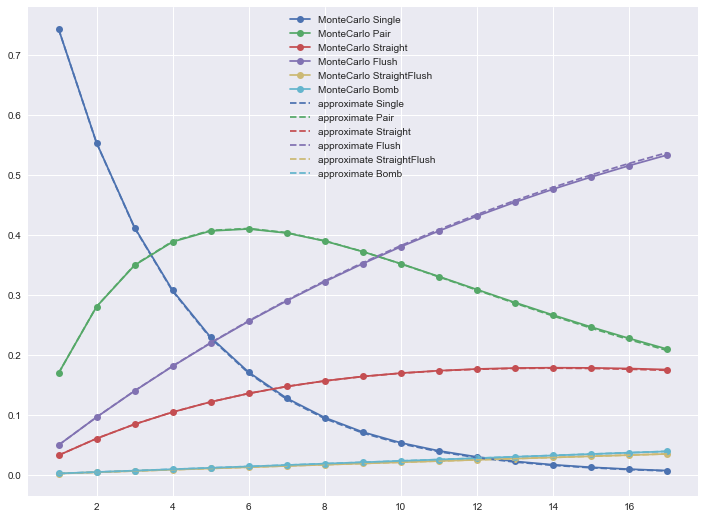

In [82]:
plt.figure(figsize=(12, 9))
plot(np.arange(1, 18), fullList, '-o')
plot(np.arange(1, 18), apxFull, '--')
plt.legend(['MonteCarlo ' + n for n in TypeNames] 
           + ['approximate ' + n for n in TypeNames]);

如上图，和蒙特卡罗方法的解非常接近  
误差变化如下：

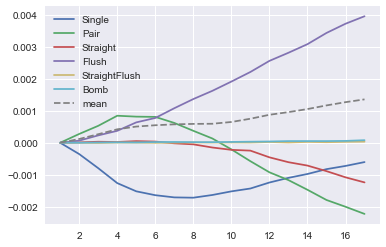

In [83]:
plot(np.arange(1, 18), apxFull - fullList)

plot(
    np.arange(1, 18),
    np.abs(apxFull - fullList).mean(axis=1),
    '--',
    color='gray')
plt.legend(TypeNames + ['mean']);

总体上人数越多，误差越大

In [84]:
trueRate_2 - apxFull[1]

matrix([[  3.5314e-04,  -2.7443e-04,  -1.1849e-05,  -6.5959e-05,
          -3.0842e-07,  -5.9378e-07]])

二人局的近似计算值与真值相差很小，而且越大的牌相差越小，因为此时条件概率中的条件更易达成，影响更小

## 总结

### 概率

每种类型的牌全场最大的概率随人数的变化曲线：

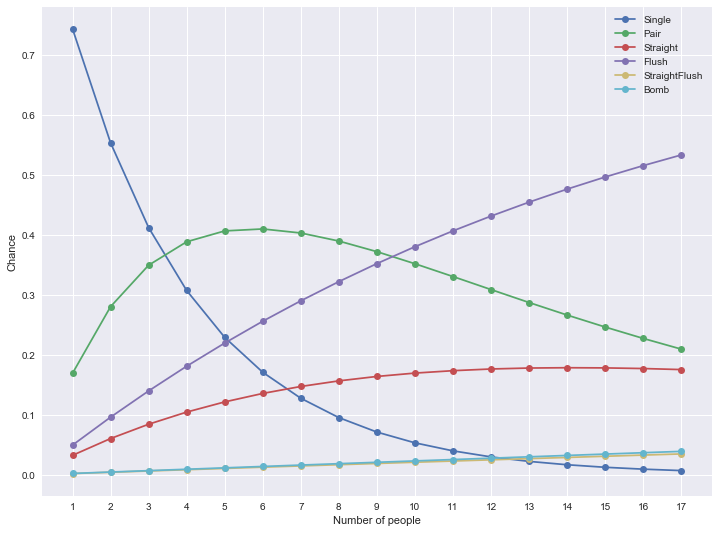

In [85]:
plt.figure(figsize=(12, 9))
plot(np.arange(1, 18), fullList, '-o')
plt.legend(TypeNames)
plt.xticks(range(1, 18))
plt.xlabel('Number of people')
plt.ylabel('Chance');

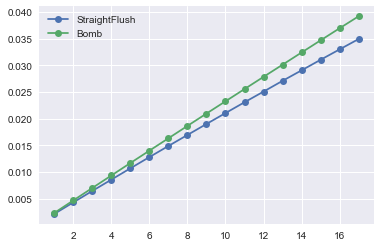

In [86]:
plot(np.arange(1, 18), fullList[:, -2:], '-o')
plt.legend(TypeNames[-2:]);

绘制累加后的条形图：

In [87]:
cuFull=fullList.cumsum(axis=1)

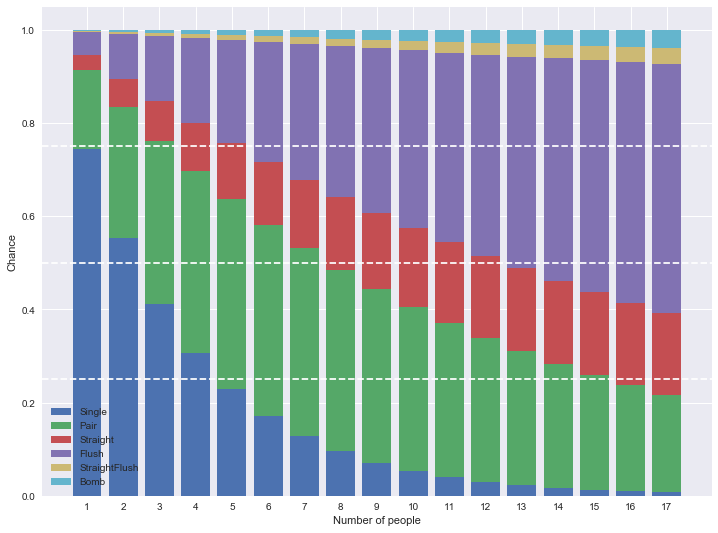

In [88]:
plt.figure(figsize=(12, 9))
plt.bar(np.arange(1, 18), fullList[:, 0])
for i in range(1, 6):
    plt.bar(np.arange(1, 18), fullList[:, i], bottom=cuFull[:, i - 1])

plt.legend(TypeNames)
plt.axhline(0.5, linestyle='--', color='w')
plt.axhline(0.25, linestyle='--', color='w')
plt.axhline(0.75, linestyle='--', color='w')
plt.xticks(range(1, 18))
plt.xlabel('Number of people')
plt.ylabel('Chance');

例如8人局的时候，你拿到一副小顺子，此时有一半可能场上有比你大的牌

### 方法

穷举法|蒙特卡罗法|近似计算
:-:|:-:|:-:|:-:
复杂度|指数<br>随人数|$O(n^2)$<br>随精度|$O(log(n))$<br>随人数
速度|非常慢|可控|非常快
精度|无误差|可控|不可估
总评|不现实|可接受|可接受